In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batch_2 = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
batch_per_gene = []
fc_per_gene = []
genes = []

with open("microarray_TGFb1_forMarcell.csv", "r") as f:
    current_batch = ""
    lines_skipped = 0
    
    for line in f:           
        if ">>" in line and 'all' not in line:
            line = line.split()
            current_batch = line[1]
            lines_skipped = 0
            continue
        
        if current_batch and lines_skipped < 2:
            lines_skipped += 1
            continue

        if not current_batch:
            continue
        
        line = [field for field in line.rstrip().rstrip(',').split(',')]
        
        try:
            gene = line[1]
            fc = float(line[5])
            
            if fc >= -1:
                continue
            
            genes.append(gene)
            fc_per_gene.append(fc)
            batch_per_gene.append(current_batch)

        except:
            continue

In [4]:
matrix = pandas.DataFrame({"gene": genes, "batch" : batch_per_gene, "fc": fc_per_gene})

In [5]:
interesting_genes = matrix.loc[matrix['batch'] == 'A.only']

In [23]:
interesting_genes

,gene,batch,fc
0,ADAMTS1,A.only,-3.079818
1,VGLL3,A.only,-2.995344
2,TNFRSF11B,A.only,-2.560520
3,GRAMD3,A.only,-2.522434
4,CHN2,A.only,-2.136480
5,RHOBTB3,A.only,-2.117265
6,PKP4,A.only,-1.986625
7,TXNRD1,A.only,-1.918100
8,WEE1,A.only,-1.856794
9,IL18R1,A.only,-1.782566


In [24]:
interesting_genes = list(interesting_genes['gene'])

In [25]:
interesting_genes

['ADAMTS1',
 'VGLL3',
 'TNFRSF11B',
 'GRAMD3',
 'CHN2',
 'RHOBTB3',
 'PKP4',
 'TXNRD1',
 'WEE1',
 'IL18R1',
 'SFRP4',
 'CYTH3',
 'LASS6',
 'RAPH1',
 'RHOBTB1',
 'TFIP11',
 'C13ORF31',
 'DTWD1',
 'LOC650494',
 'SLIT3',
 'MIR1974',
 'CHN2',
 'GNAI1',
 'PXMP2',
 'SNX6',
 'LOC390530',
 'LOC100192378',
 'CTBP2',
 'FAM39E',
 'IL7R',
 'BAG2',
 'COLQ',
 'AKR1D1',
 'HS.569162',
 'ITSN1',
 'FCAR',
 'FLJ46309',
 'LOC728809',
 'C21ORF55',
 'PRAMEF13',
 'RGL1',
 'PNPT1',
 'C10ORF58',
 'FAM39DP',
 'CYTH3',
 'ROCK2',
 'MTUS1',
 'LOC339970',
 'LOC391811',
 'ATP2B1',
 'MAN2B1',
 'LOC642782',
 'FLJ44124',
 'C21ORF24',
 'LOC100133233',
 'HS.193406',
 'LOC729500',
 'LOC100133649',
 'C10ORF26',
 'ETHE1',
 'OSBPL8',
 'CEP27',
 'CAND2',
 'BCKDHB',
 'LOC401098',
 'LILRB1',
 'TNFSF14',
 'AASS',
 'LOC645688',
 'BRE',
 'MKNK2',
 'HS.527657',
 'ROBO3',
 'WHAMML1',
 'LOC202781',
 'LOC100131989',
 'LOC729500',
 'LOC645212',
 'PRSS12',
 'GLTSCR1',
 'LYRM1',
 'ORC6L',
 'LOC100133298',
 'FARSLB',
 'SLC27A5',
 'SCCPDH'

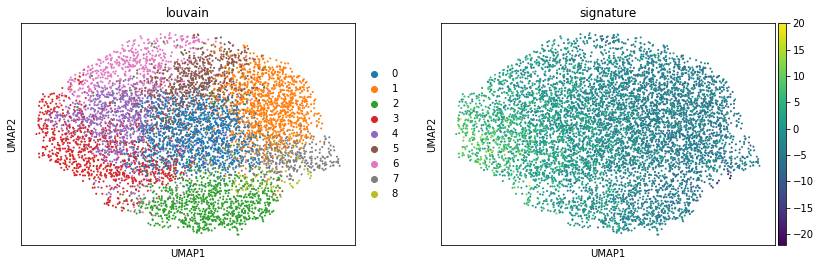

In [26]:
batch_2.obs["signature"] = batch_2[:, adata.var.gene_ids.isin(interesting_genes)].X.sum(1)
sc.pl.umap(batch_2, color=['louvain', 'signature'])